## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

[2 1 1 ... 2 2 1]
8930
9119
537
10051
6371
4546
4571
4383
8924
5957
3391
6422
976
5577
9020
8264
4009
6235
4798
1448
9872
757
1504
5186
464
670
10059
9678
9782
4319
['the', 'to', 'and', 'you', 'of', 'is', 'it', 'in', 'that', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'not', 'just', 'but', 'with', 'at', 'can', 'like', 'all', 'are', 'your', 'was', 'when', 'if']
[1736 1289  955  796  793  787  717  626  537  535  446  390  383  380
  350  328  312  303  301  293  288  269  257  243  243  231  229  228
  226  216]


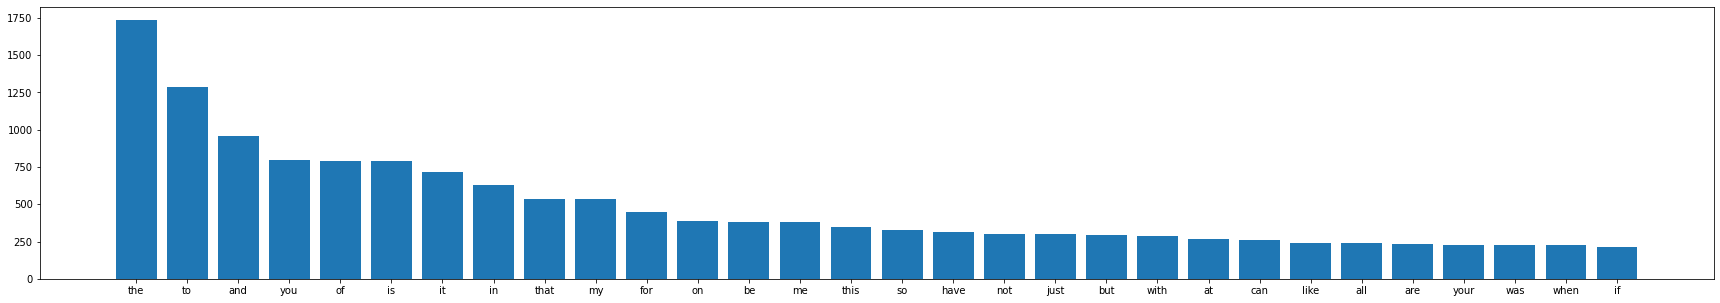

[1 1 2 ... 1 1 1]
1687
1739
99
909
1240
1938
903
867
655
1686
1165
1257
185
1088
1843
1567
290
150
785
82
934
133
1893
277
705
1940
1804
1712
1009
1212
['the', 'to', 'and', 'it', 'of', 'you', 'is', 'in', 'for', 'that', 'my', 'on', 'be', 'me', 'was', 'so', 'can', 'at', 'have', 'all', 'just', 'are', 'with', 'but', 'get', 'your', 'up', 'this', 'like', 'not']
[153 138  92  83  83  82  77  69  57  55  52  46  40  36  34  34  32  30
  30  30  29  29  29  26  26  24  24  24  24  24]


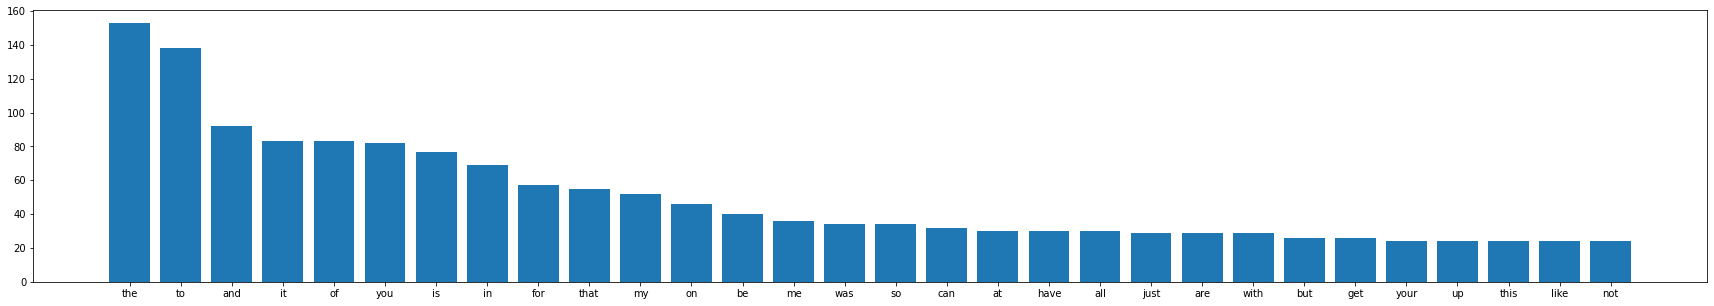

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

count_vect_train = CountVectorizer()
X_counts_train = count_vect_train.fit_transform(train_df.text)
term_frequencies_train = X_counts_train.toarray().sum(axis=0)
#check the term frequencies
print(term_frequencies_train)
N = 30
index = np.arange(N)
#store the top 30 words in top_term_train
top_term_train = []
for i in np.argsort(term_frequencies_train)[::-1][:N]:
    print(i)
    top_term_train.append(count_vect_train.get_feature_names()[i])
y_train = np.sort(term_frequencies_train)[::-1][:N]
print(top_term_train)
print(y_train)
#First we need to train the DataSet
Total_Count_Vectors=CountVectorizer()
Total_X_Train_Counts=Total_Count_Vectors.fit_transform(train_df.text)
Total_Term_Frequencies=Total_X_Train_Counts.toarray().sum(axis=0)
#Now we need to print the top 30
NumOfTermsToShow=30
Final_Sorted=[]
Sorted_Terms=np.argsort(Total_Term_Frequencies)[::-1][:NumOfTermsToShow]
for term in Sorted_Terms:
    Final_Sorted.append(Total_Count_Vectors.get_feature_names()[term])
y=np.sort(Total_Term_Frequencies)[::-1][:NumOfTermsToShow]
#Now we need to just plot (for training)
#MyChart=plt.figure()
plt.figure(figsize=(30,5))
MyChart=plt.bar(Final_Sorted,y)
plt.show()
#Now we need to just plot (for testing)
#MyChart=plt.figure()
count_vect_test = CountVectorizer()
X_counts_test = count_vect_test.fit_transform(test_df.text)
term_frequencies_test = X_counts_test.toarray().sum(axis=0)
print(term_frequencies_test)
N = 30
index = np.arange(N)
top_term_test = []
for i in np.argsort(term_frequencies_test)[::-1][:N]:
    print(i)
    top_term_test.append(count_vect_test.get_feature_names()[i])
y_test = np.sort(term_frequencies_test)[::-1][:N]
print(top_term_test)
print(y_test)
#plot the figure
fig = plt.figure(figsize=(30,5))
MyChart=plt.bar(top_term_test,y_test)
plt.show()

In [15]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [16]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/home/yalda/Yalda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 4, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['change',
 'cheer',
 'cheerful',
 'cheering',
 'cheery',
 'class',
 'come',
 'comes',
 'could',
 'country']

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# use nltk tokenizer, feature dim = 1000
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# tfidf matrix
train_tfidf_1000 = tfidf_1000.fit_transform(train_df['text'])
train_tfidf_1000 = train_tfidf_1000.toarray()

# feature names
feature_names_1000 = tfidf_1000.get_feature_names()
print('TF-IDF matrix {:} x {:} '.format(train_tfidf_1000.shape[0], train_tfidf_1000.shape[1]))
print(feature_names_1000[100:110])

TF-IDF matrix 3613 x 1000 
['awareness', 'away', 'awe', 'awesome', 'awful', 'b', 'baby', 'back', 'bad', 'ball']


In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['joy', 'sadness', 'joy', 'joy', 'anger', 'fear', 'fear', 'anger',
       'joy', 'joy'], dtype=object)

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.66


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.67      0.70      0.69        84
        fear       0.67      0.65      0.66       110
         joy       0.65      0.65      0.65        79
     sadness       0.66      0.65      0.65        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[59 12 10  3]
 [15 72 10 13]
 [ 6 13 51  9]
 [ 8 10  8 48]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

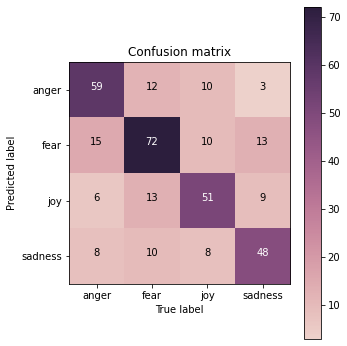

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?
# Answer here
The Confusion Matrix can be seen as a "table" that describes the performance of a classification model. The confusion matrix function is available in the sklearn metrics module and in this particular case, the function will return a 4x4 NumPy array since there are 4 different classes (emotions) in the dataset. The diagonal values represent the points where the predicted labels are equal to the true labels, in a multiclass classification the diagonal values are the True Positives (TP) for each class. Taking class "anger" as an example, we can see that it's TP = 59 (true=anger and predict=anger) and FP = 15+6+8 (true!=anger and predict=anger), FN = 12+10+3 (true=anger and predict!=anger), Precision = 59/(59+29) = 0.67 (TP / predict=anger), Recall = 59/(59+25) = 0.7 (TP / true=anger), and F1-score = 2(Precision Recall)/(Precision + Recall) = 0.69 so anger and fear confuse with each other easily, it could be the words expressing fear and anger are very similar. There is the same problem between fear and sadness. The same applies to the other three classes, in this particular confusion matrix, the columns represent the true labels and the rows the actual predicted labels. We can find out the decision tree is hard to divide Fear from others and this classifier has issues of underfitting and overfitting.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
#First we need to apply MultinomialNB for train and test data 
MyModel=MultinomialNB()

#First part is training
MyModel=MyModel.fit(X_train,y_train)

#Then prediction ...
Predicted_Trained_y=MyModel.predict(X_train)
Predicted_Tested_y=MyModel.predict(X_test)

#Accuracy 
Acc_Training_Data=accuracy_score(y_true=y_train,y_pred=Predicted_Trained_y)
Acc_Testing_Data=accuracy_score(y_true=y_test,y_pred=Predicted_Tested_y)

print('training accuracy: {}'.format(round(Acc_Training_Data, 2)))
print('testing accuracy: {}'.format(round(Acc_Testing_Data, 2)))



training accuracy: 0.79
testing accuracy: 0.69


In [35]:
## Naive Bayes classifier precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=Predicted_Tested_y))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



In [36]:
## check Naive Bayes classifier by confusion matrix
from sklearn.metrics import confusion_matrix

Out = confusion_matrix(y_true=y_test, y_pred=Predicted_Tested_y)
print(Out)


[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


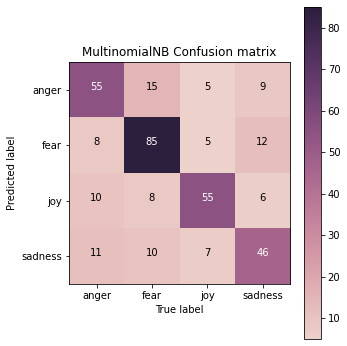

In [37]:
## plot Multinomial Naive Bayes classifier confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(Out, classes=my_tags, title='MultinomialNB Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here
The decision tree (DT) model is hard to divide Fear from others, but the Naive Bayes (NB) model improve these disadvantage especially at divide Joy and Fear.NB model is also bad at divide [anger, sadness] , [anger, fear] and [sadness, fear]. Maybe these emotions have some same features, so that the NB is hard to classified. (NB assume all the features are independent.) I think the reason of DT model is worse than NB model is the Fear data in training sets are much more than others, so that the DT model is a little bit overfitting. We can see that according to the training accuracy of Decision Tree model, it seems not so normal and it may be a sign of overfitting, this can be happening because decision trees tend to overfit the training data more than other techniques. As decision trees use the "divide and conquer" method, they tend to perform well if a few highly relevant attributes exist, but less so if many complex interactions are present. For example, the decision tree model may have problems when identifying between "fear" and "sadness" where attributes may be similar. On the other hand, Naive Bayes classifiers assume that there are no dependencies amongst attributes. This assumption is called class conditional independence. Since Naive Bayes classifier has this assumption, it will handle the similar attributes between classes differently using conditional probabilities leading to a better accuracy. As a conclusion, we can see that the Naive Bayes outperform the Decision Tree model, there is a significant precision improvement in all classes, and a higher accuracy prediction for the "fear" label can be observed. Training accuracy: DT > NB, 0.99 > 0.79, and testing accuracy: NB > DT, 0.69 > 0.66 so it is clear that Decision Tree has overfitting problem.

In [39]:
import keras
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [40]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1571     fear
2776      joy
1479     fear
269     anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [41]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [42]:
from  tensorflow.keras.models import Model
from  tensorflow.keras.layers import Input, Dense
from  tensorflow.keras.layers import ReLU, Softmax


# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                

In [43]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 2ms/step - loss: 1.3349 - accuracy: 0.3573 - val_loss: 1.2782 - val_accuracy: 0.4409
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.6241 - val_loss: 0.9501 - val_accuracy: 0.6455
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.6043 - accuracy: 0.7830 - val_loss: 0.8378 - val_accuracy: 0.6888
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8475 - val_loss: 0.7866 - val_accuracy: 0.7061
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8793 - val_loss: 0.8376 - val_accuracy: 0.6772
Epoch 6/25
113/113 [==============================] - 0s 1ms/step - loss: 0.2654 - accuracy: 0.9059 - val_loss: 0.9221 - val_accuracy: 0.6859
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2207 - accuracy: 0.9222 - val_loss: 0.9850 - val_accuracy: 0.6686
Epoch 

In [44]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[9.7829476e-02, 1.4801899e-03, 8.9856738e-01, 2.1229531e-03],
       [1.3871781e-04, 9.9970740e-01, 1.4845180e-04, 5.3921035e-06],
       [9.0486277e-03, 3.0480796e-03, 9.8781335e-01, 8.9994785e-05],
       [2.9495012e-04, 2.2729207e-02, 4.4834450e-02, 9.3214142e-01],
       [4.3138018e-01, 3.6342660e-01, 2.0337869e-01, 1.8145206e-03]],
      dtype=float32)

In [45]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'joy', 'sadness', 'anger'], dtype=object)

In [46]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [47]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.357321,1.334927,0.440922,1.278216
1,1,0.624135,1.009188,0.645533,0.950146
2,2,0.783006,0.604277,0.688761,0.837817
3,3,0.847495,0.421494,0.706052,0.786635
4,4,0.879325,0.326818,0.677233,0.837642
5,5,0.905895,0.265383,0.685879,0.922066
6,6,0.922225,0.220702,0.668588,0.985012
7,7,0.938278,0.181251,0.668588,1.045485
8,8,0.952394,0.155317,0.668588,1.089702
9,9,0.957653,0.133823,0.648415,1.160043


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

<function matplotlib.pyplot.show(close=None, block=None)>

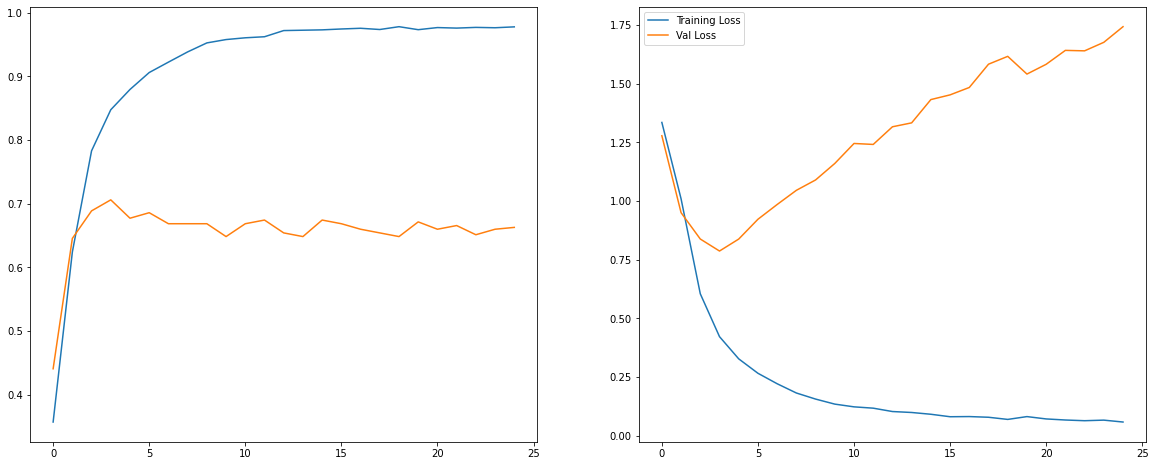

In [48]:
# Answer here

import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
#Plotting 2 images in one single whole row , First image is the comparison between behaviour of Train Accuracy and Val Accuracy
#Image 1
plt.subplot(121)
X11_Axis=training_log['epoch']
Y11_Axis=training_log['accuracy']
X12_Axis=training_log['epoch']
Y12_Axis=training_log['val_accuracy']
plt.plot(X11_Axis,Y11_Axis,label="Training Accuracy")
plt.plot(X12_Axis,Y12_Axis,label="Val Accuracy")

#Image 2, Second image is the comparison between behaviour of Train Loss and Val Loss
plt.subplot(122)
X21_Axis=training_log['epoch']
Y21_Axis=training_log['loss']
X22_Axis=training_log['epoch']
Y22_Axis=training_log['val_loss']
plt.plot(X21_Axis,Y21_Axis,label="Training Loss")
plt.plot(X22_Axis,Y22_Axis,label="Val Loss")

plt.legend()
plt.show

In [49]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1571,20714,It's 5:55am. I'm hungry but there is no food.,"[It, 's, 5:55am, ., I, 'm, hungry, but, there,..."
2776,30772,Harking back to 2012 - DT's challenge to @POTU...,"[Harking, back, to, 2012, -, DT, 's, challenge..."
1479,20622,How can you blame the manager watching these p...,"[How, can, you, blame, the, manager, watching,..."
269,10269,Did we miss the fact that #BurkeRamsey swung &...,"[Did, we, miss, the, fact, that, #, BurkeRamse..."
3301,40474,some people leave toilets in fucking grim states,"[some, people, leave, toilets, in, fucking, gr..."


In [50]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['It', "'s", '5:55am', '.', 'I', "'m", 'hungry', 'but', 'there', 'is', 'no', 'food', '.']),
       list(['Harking', 'back', 'to', '2012', '-', 'DT', "'s", 'challenge', 'to', '@', 'POTUS', '...', 'I', 'will', 'give', '...', 'DT', 'a', 'hearty', 'thank', 'you', '...', 'if', 'he', 'will', 'release', 'his', 'tax', 'returns', '....']),
       list(['How', 'can', 'you', 'blame', 'the', 'manager', 'watching', 'these', 'players', 'play', '?', 'It', "'s", 'abysmal', '.', 'Our', 'team', 'are', 'dreadful', '.', 'If', 'Jose', 'ca', "n't", 'save', 'us', '.', 'No-one', 'can', '.', '#', 'mufc'])],
      dtype=object)

In [51]:
## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1571,20714,It's 5:55am. I'm hungry but there is no food.,"[It, 's, 5:55am, ., I, 'm, hungry, but, there,..."
2776,30772,Harking back to 2012 - DT's challenge to @POTU...,"[Harking, back, to, 2012, -, DT, 's, challenge..."
1479,20622,How can you blame the manager watching these p...,"[How, can, you, blame, the, manager, watching,..."
269,10269,Did we miss the fact that #BurkeRamsey swung &...,"[Did, we, miss, the, fact, that, #, BurkeRamse..."
3301,40474,some people leave toilets in fucking grim states,"[some, people, leave, toilets, in, fucking, gr..."


In [52]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [53]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.12277911, -0.10722772,  0.09485822,  1.0760142 ,  0.25977382,
        0.25313345,  0.21239716,  0.38538176, -0.12008823,  0.27603653,
        0.23372203, -0.38595363,  1.0010614 ,  0.2456487 , -0.09960359,
       -0.04447257, -0.1579752 , -0.4044369 ,  0.32798538,  0.18331666,
        0.28326368, -0.39810795,  0.6934765 ,  0.21296707, -0.17596737,
       -0.14206836, -0.5046386 , -0.23233747,  0.14514509,  0.59225553,
        0.0427011 , -0.9559815 , -0.22512637,  0.9574092 ,  0.5158299 ,
        0.658922  ,  0.16051497, -0.49088857,  0.89899856,  0.5143814 ,
       -0.5942064 , -0.07955131,  1.0352962 ,  0.5362565 ,  0.84555703,
        0.3292844 , -0.6722904 , -0.04830049,  0.7894544 , -0.02323175,
       -0.27466315, -0.00303353, -0.16318156, -0.22474778,  0.42166832,
        0.17562944,  0.07757186, -0.9504992 , -0.10886095, -0.29724482,
        0.17647387,  0.5688646 , -0.0095068 , -0.751877  ,  0.11105001,
       -0.36245742,  0.69368607, -0.16460888, -0.38694134, -0.65

In [54]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('Makes', 0.9559512138366699),
 ('birthday', 0.9528014659881592),
 ('A4', 0.9471951723098755),
 ('Walk', 0.9440939426422119),
 ('Abraham', 0.940915048122406),
 ('Be', 0.9389141798019409),
 ('kinda', 0.9359045028686523),
 ('plz', 0.9345323443412781),
 ('pls', 0.9341166019439697),
 ('MHchat', 0.9325543642044067)]

In [55]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?
## Answer
We can try two different simple approaches:
Average of Word2Vec vectors: Take the average of all vectors in a sentence, then this average vector will represent the sentence vector. Average of Word2Vec vectors with TF-IDF: This approach can be better than just averaging all vectors, we take the word vectors and multiply it with their TF-IDF scores, then we just take the average and it will represent our sentence vector. These are just two simple approaches, depending on our model we can try other options. We can also use these vectors with models that accept a sequence as an input.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [14]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

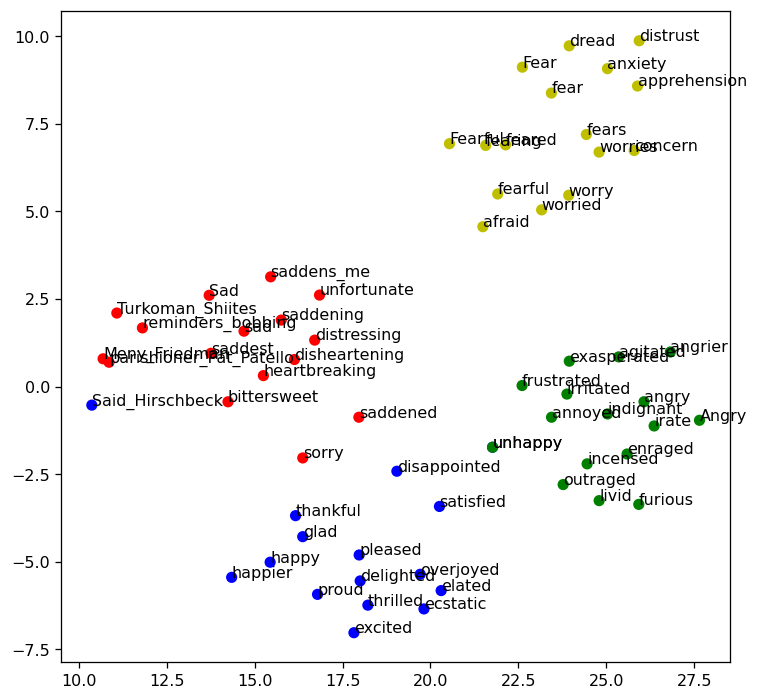

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()